In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file ="output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [3]:
# OpenWeatherMap API Key
api_key = "67bbd44f9c04b46485066b28301bcff9"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=norman%20wells
Processing Record 2 of Set 1 | monzon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=monzon
Processing Record 3 of Set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=hobart
Processing Record 4 of Set 1 | kezmarok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=kezmarok
Processing Record 5 of Set 1 | codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=codrington
Processing Record 6 of Set 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=jamestown
Processing Record 7 

Processing Record 2 of Set 2 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=saskylakh
Processing Record 3 of Set 2 | wewak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=wewak
Processing Record 4 of Set 2 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=la%20ronge
Processing Record 5 of Set 2 | wum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=wum
Processing Record 6 of Set 2 | cohoes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=cohoes
Processing Record 7 of Set 2 | dolbeau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=dolbeau
City not found. Skipping...
Processing Record 8 of Set 2 | arraial do cabo
http://api.openweathermap.org/d

Processing Record 4 of Set 3 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=upernavik
Processing Record 5 of Set 3 | isla vista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=isla%20vista
Processing Record 6 of Set 3 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=bethel
Processing Record 7 of Set 3 | villarrobledo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=villarrobledo
Processing Record 8 of Set 3 | amapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=amapa
Processing Record 9 of Set 3 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=bengkulu
City not found. Skipping...
Processing Record 10 of Set 3 | mahadday weyne
http:

Processing Record 6 of Set 4 | grand river south east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=grand%20river%20south%20east
City not found. Skipping...
Processing Record 7 of Set 4 | matagami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=matagami
Processing Record 8 of Set 4 | novovarshavka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=novovarshavka
Processing Record 9 of Set 4 | bontang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=bontang
Processing Record 10 of Set 4 | aloleng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=aloleng
Processing Record 11 of Set 4 | plettenberg bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=plettenberg%20bay
Pr

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=luanda
Processing Record 9 of Set 5 | kushima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=kushima
Processing Record 10 of Set 5 | ambilobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=ambilobe
Processing Record 11 of Set 5 | namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=namibe
Processing Record 12 of Set 5 | gastonia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=gastonia
Processing Record 13 of Set 5 | chagda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=chagda
City not found. Skipping...
Processing Record 14 of Set 5 | plouzane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

City not found. Skipping...
Processing Record 12 of Set 6 | joshimath
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=joshimath
Processing Record 13 of Set 6 | clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=clyde%20river
Processing Record 14 of Set 6 | alice springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=alice%20springs
Processing Record 15 of Set 6 | hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=hami
Processing Record 16 of Set 6 | carballo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=carballo
Processing Record 17 of Set 6 | newport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=newport
Processing Record 18 of Set 6 | kasongo-lu

City not found. Skipping...
Processing Record 16 of Set 7 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=bambous%20virieux
Processing Record 17 of Set 7 | pemba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=pemba
Processing Record 18 of Set 7 | wuning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=wuning
Processing Record 19 of Set 7 | broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=broome
Processing Record 20 of Set 7 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=saint-augustin
Processing Record 21 of Set 7 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=saint-pierre
Processing Record 22 of Set 7 | 

Processing Record 19 of Set 8 | kazalinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=kazalinsk
City not found. Skipping...
Processing Record 20 of Set 8 | melfi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=melfi
Processing Record 21 of Set 8 | carlos chagas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=carlos%20chagas
Processing Record 22 of Set 8 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=los%20llanos%20de%20aridane
Processing Record 23 of Set 8 | mareeba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=mareeba
Processing Record 24 of Set 8 | namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=namatanai
Processing Rec

Processing Record 22 of Set 9 | basco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=basco
Processing Record 23 of Set 9 | cheremkhovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=cheremkhovo
Processing Record 24 of Set 9 | keskin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=keskin
Processing Record 25 of Set 9 | tabiauea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=tabiauea
City not found. Skipping...
Processing Record 26 of Set 9 | karamay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=karamay
City not found. Skipping...
Processing Record 27 of Set 9 | kharar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=kharar
Processing Record 28 of Set 9 | iqal

Processing Record 24 of Set 10 | noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=noumea
Processing Record 25 of Set 10 | yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=yulara
Processing Record 26 of Set 10 | amarante do maranhao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=amarante%20do%20maranhao
Processing Record 27 of Set 10 | necochea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=necochea
Processing Record 28 of Set 10 | whitehorse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=whitehorse
Processing Record 29 of Set 10 | novikovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=novikovo
Processing Record 30 of Set 10 | north battleford
ht

Processing Record 26 of Set 11 | moron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=moron
Processing Record 27 of Set 11 | sabha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=sabha
Processing Record 28 of Set 11 | palimbang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=palimbang
Processing Record 29 of Set 11 | rimbey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=rimbey
Processing Record 30 of Set 11 | nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=nemuro
Processing Record 31 of Set 11 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=fairbanks
Processing Record 32 of Set 11 | te karaka
http://api.openweathermap.org/data/2.5/weather?un

Processing Record 29 of Set 12 | igarape-miri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=igarape-miri
City not found. Skipping...
Processing Record 30 of Set 12 | omihachiman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=omihachiman
Processing Record 31 of Set 12 | paita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=paita
Processing Record 32 of Set 12 | pouembout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=pouembout
Processing Record 33 of Set 12 | malanje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=malanje
Processing Record 34 of Set 12 | kuytun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=kuytun
Processing Record 35 of Set 12 | palauig
htt

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          539
Cloudiness    539
Country       539
Date          539
Humidity      539
Lat           539
Lng           539
Max Temp      539
Wind Speed    539
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,norman wells,20,CA,1554951600,59,65.28,-126.83,33.80,6.93
1,monzon,90,IT,1554956885,100,46.45,11.69,46.99,20.80
2,hobart,20,AU,1554956895,39,-42.88,147.33,66.00,9.17
3,kezmarok,90,SK,1554956836,74,49.14,20.43,39.00,13.87
4,codrington,75,AU,1554956927,88,-28.95,153.24,75.20,6.93


# Latitude vs Temperature Plot

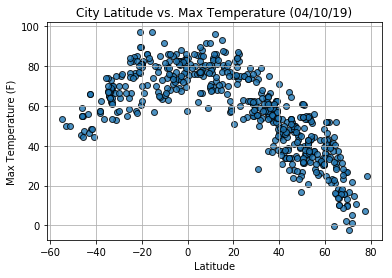

In [6]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

# Latitude vs. Humidity Plot

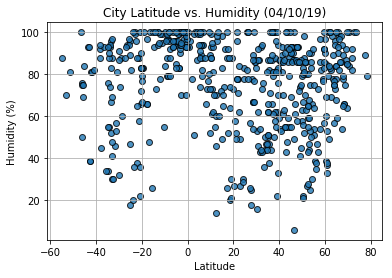

In [7]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

# Latitude vs. Cloudiness Plot

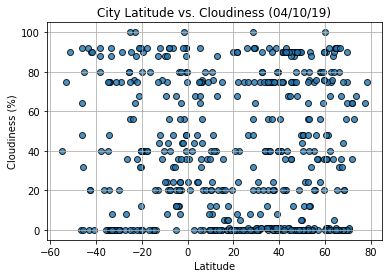

In [8]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed Plot

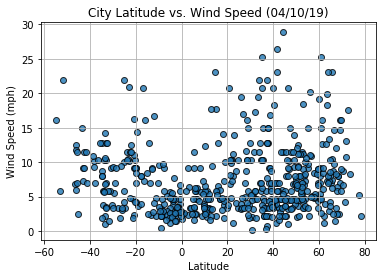

In [9]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()
